In [1]:
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
# graficos incrustados
%matplotlib inline

#Carga de los CSV
BBVA_data = pd.read_csv('labelencoder_train_clientes.csv', header=0)
print("Data Train: ", BBVA_data.shape)
BBVA_test = pd.read_csv('labelencoder_test_clientes.csv', header=0)
print("Data Test:  ", BBVA_test.shape)

Data Train:  (70000, 54)
Data Test:   (30000, 53)


In [2]:
primera = BBVA_data.columns.values[0]
print(BBVA_data.isnull().any().any())
print(BBVA_test.isnull().any().any())

X_train = BBVA_data.drop([primera, 'ID_CORRELATIVO', 'ATTRITION'], axis=1).values
print(type(X_train), X_train.shape)
X_predic = BBVA_test.drop([primera, 'ID_CORRELATIVO'], axis=1).values
print(type(X_predic), X_predic.shape)
y_train = BBVA_data['ATTRITION'].values
print(type(y_train), y_train.shape)

False
False
<class 'numpy.ndarray'> (70000, 51)
<class 'numpy.ndarray'> (30000, 51)
<class 'numpy.ndarray'> (70000,)


In [3]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler(copy=True, with_mean=True, with_std=True)
xx_train_std = sc_X.fit_transform(X_train.astype(float))
xx_predic_std = sc_X.transform(X_predic.astype(float))

from sklearn.preprocessing import MinMaxScaler
sc_MM = MinMaxScaler()
xx_train_mm = sc_MM.fit_transform(X_train.astype(float))
xx_predic_mm = sc_MM.transform(X_predic.astype(float))

idd = BBVA_test['ID_CORRELATIVO']
idd.shape

(30000,)

In [4]:
headers = ['CODMES', 'FLG_BANCARIZADO', 'RANG_INGRESO', 'FLAG_LIMA_PROVINCIA', 'EDAD', 'ANTIGUEDAD', 'RANG_SDO_PASIVO_MENOS0', 'SDO_ACTIVO_MENOS0', 'SDO_ACTIVO_MENOS1', 'SDO_ACTIVO_MENOS2', 'SDO_ACTIVO_MENOS3', 'SDO_ACTIVO_MENOS4', 'SDO_ACTIVO_MENOS5', 'FLG_SEGURO_MENOS0', 'FLG_SEGURO_MENOS1', 'FLG_SEGURO_MENOS2', 'FLG_SEGURO_MENOS3', 'FLG_SEGURO_MENOS4', 'FLG_SEGURO_MENOS5', 'RANG_NRO_PRODUCTOS_MENOS0', 'FLG_NOMINA', 'NRO_ACCES_CANAL1_MENOS0', 'NRO_ACCES_CANAL1_MENOS1', 'NRO_ACCES_CANAL1_MENOS2', 'NRO_ACCES_CANAL1_MENOS3', 'NRO_ACCES_CANAL1_MENOS4', 'NRO_ACCES_CANAL1_MENOS5', 'NRO_ACCES_CANAL2_MENOS0', 'NRO_ACCES_CANAL2_MENOS1', 'NRO_ACCES_CANAL2_MENOS2', 'NRO_ACCES_CANAL2_MENOS3', 'NRO_ACCES_CANAL2_MENOS4', 'NRO_ACCES_CANAL2_MENOS5', 'NRO_ACCES_CANAL3_MENOS0', 'NRO_ACCES_CANAL3_MENOS1', 'NRO_ACCES_CANAL3_MENOS2', 'NRO_ACCES_CANAL3_MENOS3', 'NRO_ACCES_CANAL3_MENOS4', 'NRO_ACCES_CANAL3_MENOS5', 'NRO_ENTID_SSFF_MENOS0', 'NRO_ENTID_SSFF_MENOS1', 'NRO_ENTID_SSFF_MENOS2', 'NRO_ENTID_SSFF_MENOS3', 'NRO_ENTID_SSFF_MENOS4', 'NRO_ENTID_SSFF_MENOS5', 'FLG_SDO_OTSSFF_MENOS0', 'FLG_SDO_OTSSFF_MENOS1', 'FLG_SDO_OTSSFF_MENOS2', 'FLG_SDO_OTSSFF_MENOS3', 'FLG_SDO_OTSSFF_MENOS4', 'FLG_SDO_OTSSFF_MENOS5']
headers

['CODMES',
 'FLG_BANCARIZADO',
 'RANG_INGRESO',
 'FLAG_LIMA_PROVINCIA',
 'EDAD',
 'ANTIGUEDAD',
 'RANG_SDO_PASIVO_MENOS0',
 'SDO_ACTIVO_MENOS0',
 'SDO_ACTIVO_MENOS1',
 'SDO_ACTIVO_MENOS2',
 'SDO_ACTIVO_MENOS3',
 'SDO_ACTIVO_MENOS4',
 'SDO_ACTIVO_MENOS5',
 'FLG_SEGURO_MENOS0',
 'FLG_SEGURO_MENOS1',
 'FLG_SEGURO_MENOS2',
 'FLG_SEGURO_MENOS3',
 'FLG_SEGURO_MENOS4',
 'FLG_SEGURO_MENOS5',
 'RANG_NRO_PRODUCTOS_MENOS0',
 'FLG_NOMINA',
 'NRO_ACCES_CANAL1_MENOS0',
 'NRO_ACCES_CANAL1_MENOS1',
 'NRO_ACCES_CANAL1_MENOS2',
 'NRO_ACCES_CANAL1_MENOS3',
 'NRO_ACCES_CANAL1_MENOS4',
 'NRO_ACCES_CANAL1_MENOS5',
 'NRO_ACCES_CANAL2_MENOS0',
 'NRO_ACCES_CANAL2_MENOS1',
 'NRO_ACCES_CANAL2_MENOS2',
 'NRO_ACCES_CANAL2_MENOS3',
 'NRO_ACCES_CANAL2_MENOS4',
 'NRO_ACCES_CANAL2_MENOS5',
 'NRO_ACCES_CANAL3_MENOS0',
 'NRO_ACCES_CANAL3_MENOS1',
 'NRO_ACCES_CANAL3_MENOS2',
 'NRO_ACCES_CANAL3_MENOS3',
 'NRO_ACCES_CANAL3_MENOS4',
 'NRO_ACCES_CANAL3_MENOS5',
 'NRO_ENTID_SSFF_MENOS0',
 'NRO_ENTID_SSFF_MENOS1',
 'NRO_ENTID_

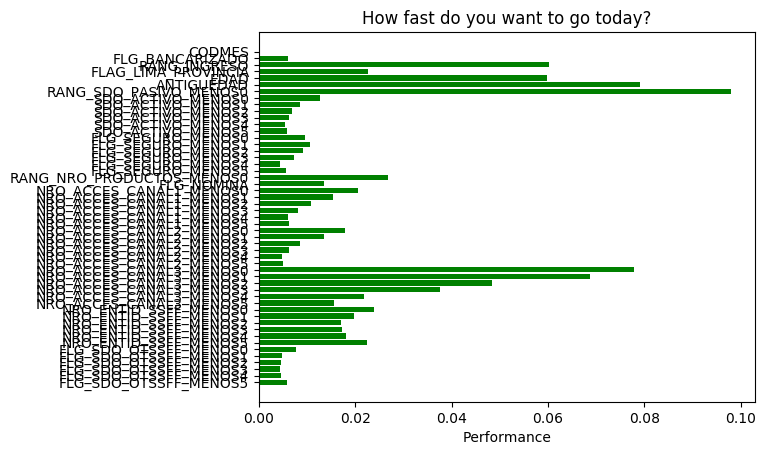

In [5]:
import matplotlib.pyplot as plt
plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()
caract = X_train.shape[1]

from sklearn.ensemble import ExtraTreesClassifier
arbol = ExtraTreesClassifier(n_estimators=25, random_state=0)
arbol.fit(xx_train_std, y_train)

ax.barh(range(caract), arbol.feature_importances_, align='center', color='green', ecolor='black')
ax.set_yticks(range(caract))
ax.set_yticklabels(headers)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

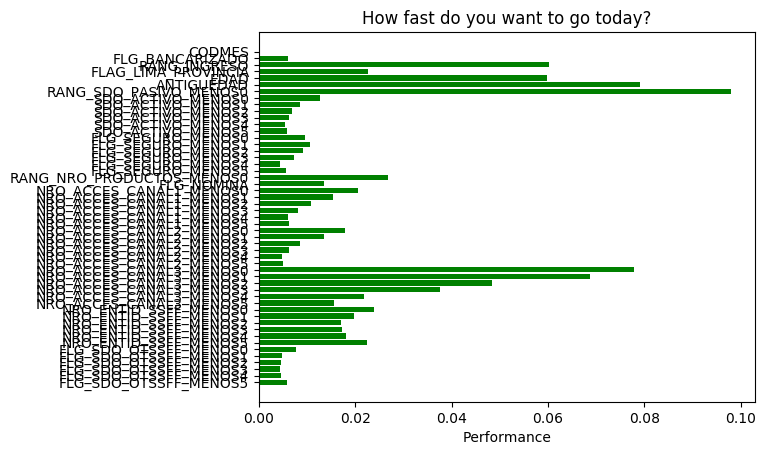

In [7]:
plt.rcdefaults()
fig, ax = plt.subplots()
caract = X_train.shape[1]
arbol = ExtraTreesClassifier(n_estimators=25, random_state=0)
arbol.fit(xx_train_mm, y_train)

ax.barh(range(caract), arbol.feature_importances_, align='center', color='green', ecolor='black')
ax.set_yticks(range(caract))
ax.set_yticklabels(headers)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

Feature ranking:
1. feature 6 (0.098074) RANG_SDO_PASIVO_MENOS0
2. feature 5 (0.079037) ANTIGUEDAD
3. feature 33 (0.077928) NRO_ACCES_CANAL3_MENOS0
4. feature 34 (0.068780) NRO_ACCES_CANAL3_MENOS1
5. feature 2 (0.060283) RANG_INGRESO
6. feature 4 (0.059707) EDAD
7. feature 35 (0.048422) NRO_ACCES_CANAL3_MENOS2
8. feature 36 (0.037476) NRO_ACCES_CANAL3_MENOS3
9. feature 19 (0.026724) RANG_NRO_PRODUCTOS_MENOS0
10. feature 39 (0.023954) NRO_ENTID_SSFF_MENOS0
11. feature 3 (0.022509) FLAG_LIMA_PROVINCIA
12. feature 44 (0.022465) NRO_ENTID_SSFF_MENOS5
13. feature 37 (0.021751) NRO_ACCES_CANAL3_MENOS4
14. feature 21 (0.020564) NRO_ACCES_CANAL1_MENOS0
15. feature 40 (0.019667) NRO_ENTID_SSFF_MENOS1
16. feature 43 (0.017951) NRO_ENTID_SSFF_MENOS4
17. feature 27 (0.017836) NRO_ACCES_CANAL2_MENOS0
18. feature 42 (0.017132) NRO_ENTID_SSFF_MENOS3
19. feature 41 (0.016948) NRO_ENTID_SSFF_MENOS2
20. feature 38 (0.015652) NRO_ACCES_CANAL3_MENOS5
21. feature 22 (0.015246) NRO_ACCES_CANAL1_MENOS1
22. f

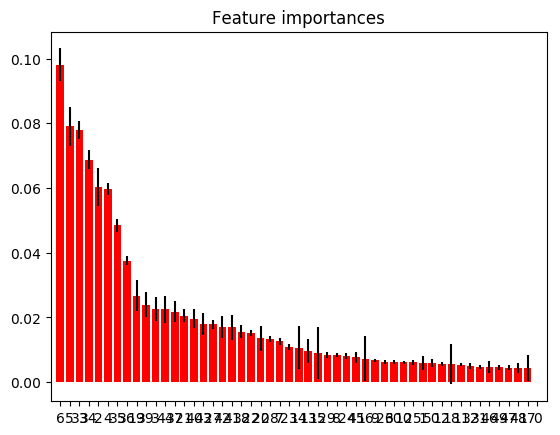

In [10]:
from sklearn.ensemble import ExtraTreesClassifier
X = xx_train_std
forest = ExtraTreesClassifier(n_estimators=25, random_state=0)
forest.fit(xx_train_std, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]), headers[indices[f]])

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

Automatically created module for IPython interactive environment


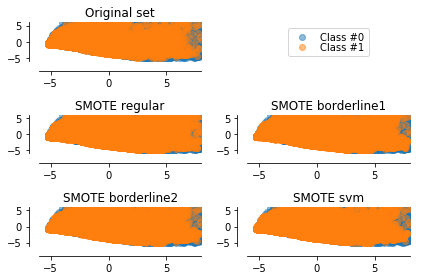

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE
y = y_train
X = xx_train_std
print(__doc__)


def plot_resampling(ax, X, y, title):
    c0 = ax.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5)
    c1 = ax.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5)
    ax.set_title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])

    return c0, c1


# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X)

# Apply regular SMOTE
kind = ['regular', 'borderline1', 'borderline2', 'svm']
sm = [SMOTE(kind=k) for k in kind]
X_resampled = []
y_resampled = []
X_res_vis = []
for method in sm:
    X_res, y_res = method.fit_sample(X, y)
    X_resampled.append(X_res)
    y_resampled.append(y_res)
    X_res_vis.append(pca.transform(X_res))

# Two subplots, unpack the axes array immediately
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)
# Remove axis for second plot
ax2.axis('off')
ax_res = [ax3, ax4, ax5, ax6]

c0, c1 = plot_resampling(ax1, X_vis, y, 'Original set')
for i in range(len(kind)):
    plot_resampling(ax_res[i], X_res_vis[i], y_resampled[i],
                    'SMOTE {}'.format(kind[i]))

ax2.legend((c0, c1), ('Class #0', 'Class #1'), loc='center',
           ncol=1, labelspacing=0.)
plt.tight_layout()
plt.show()